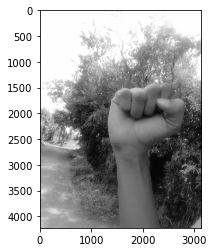

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:/New WinRAR ZIP archive"

CATEGORIES = ["Zoom-In", "Zoom-out"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [14]:
print(img_array)

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [182 185 184 ... 172 172 173]
 [187 190 184 ... 173 173 174]
 [185 188 185 ... 174 173 173]]


In [15]:
print(img_array.shape)

(4224, 3136)


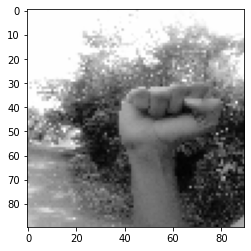

In [16]:
IMG_SIZE = 90


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [26]:
print(new_array.shape)

(90, 90)


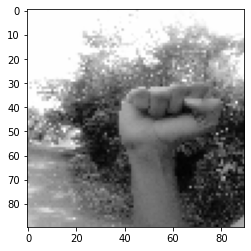

In [17]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 117.87it/s]


In [19]:
print(len(training_data))

19


In [20]:
import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
0
0
0


In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[167]
   [177]
   [176]
   ...
   [131]
   [145]
   [144]]

  [[169]
   [161]
   [176]
   ...
   [123]
   [139]
   [159]]

  [[162]
   [166]
   [174]
   ...
   [146]
   [138]
   [130]]

  ...

  [[219]
   [215]
   [213]
   ...
   [168]
   [161]
   [160]]

  [[224]
   [234]
   [211]
   ...
   [153]
   [146]
   [136]]

  [[220]
   [225]
   [222]
   ...
   [152]
   [119]
   [129]]]]


In [23]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)